In [3]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr




In [ ]:

# start by downloading https://popo.jpl.nasa.gov/pub/bioscape_netCDF/rfl/ang20231109t064755_003_L2A_OE_0b4f48b4_RFL_ORT.nc into the directory data

# open the netCDF file
nc_file = 'data/ang20231109t064755_003_L2A_OE_0b4f48b4_RFL_ORT.nc'
nc_ds = nc.Dataset(nc_file)
print(f'Groups: {nc_ds.groups.keys()}')
print(nc_ds['reflectance'])

# extract the data and filter out bad wavelengths
wl = np.array(nc_ds['reflectance']['wavelength'][:])
fwhm = np.array(nc_ds['reflectance']['fwhm'][:])
reflectance = np.array(nc_ds['reflectance']['reflectance'][:])
reflectance[np.isclose(reflectance,-0.01)] = np.nan



Groups: dict_keys(['reflectance', 'aerosol_optical_thickness', 'water_vapor'])
<class 'netCDF4._netCDF4.Group'>
group /reflectance:
    dimensions(sizes): wavelength(425)
    variables(dimensions): float32 wavelength(wavelength), float32 fwhm(wavelength), float32 reflectance(wavelength, northing, easting)
    groups: 


(425, 859, 1595)
[nan nan nan]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[nan nan nan]


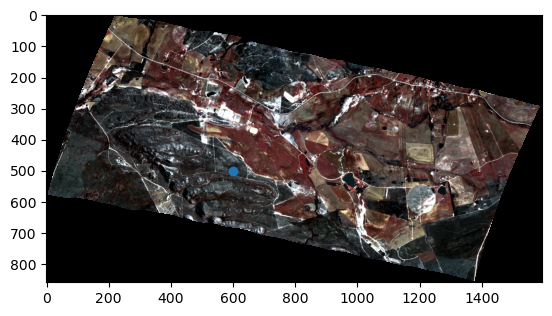

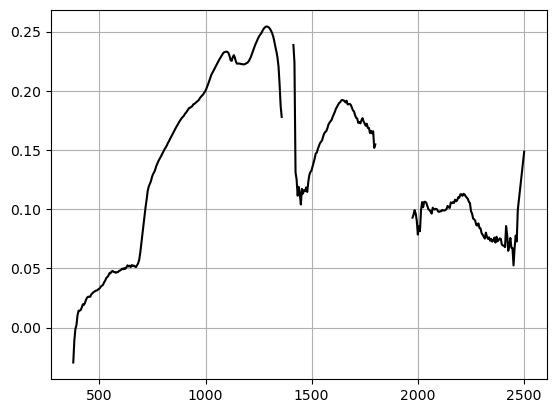

In [ ]:
# Plot some things!

print(reflectance.shape)

rgb = reflectance[np.array([30,21,12]),...].transpose((1,2,0)).astype(np.float32).copy()
rgb[rgb == -9999] = np.nan

print(np.percentile(rgb, 2, axis=(0,1)))
rgb -= np.nanpercentile(rgb, 2, axis=(0,1))[np.newaxis,np.newaxis,:]
print(np.percentile(rgb, 98, axis=(0,1)))
rgb /= np.nanpercentile(rgb, 98, axis=(0,1))[np.newaxis,np.newaxis,:]

fig = plt.figure()
plt.imshow(rgb)
plt.scatter([600],[500])

fig = plt.figure()

plt.plot(wl, reflectance[:,500,600], c='black')
plt.grid()